In [1]:
import numpy as np

In [2]:
class LinearRegression:
    num_iterations = 0
    m = 0
    c = 0
    learning_rate = 0
    coef_ = 0
    intercept_ = 0
    
    # initialize all variables
    def __init__(self, num_iterations = 1000, learning_rate=0.0001):
        self.m = np.random.randint(0,100)
        self.c = np.random.randint(0,100)
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coef_ = np.array(self.m).reshape(1)
        self.intercept_ = np.array(self.c).reshape(1)
        
    # m and c are calculated using gradient descent technique
    def gradient_descent(self, m_current, c_current, x_val, y_val, previous_error):
        m_gradient = 0
        c_gradient = 0
        num_points = len(x_val)
        N = float(num_points)
        for i in range(num_points):
            x = x_val[i][0]
            y = y_val[i]
            # error = (1/N) * (y_original-y_predicted)**2 where y_predicted = m*x + c
            m_gradient += (-2/N) * x * (y - (m_current*x + c_current))
            c_gradient += (-2/N) * (y - (m_current*x + c_current))
        m = m_current - (self.learning_rate*m_gradient)
        c = c_current - (self.learning_rate*c_gradient)
        current_error = self.r2_score(m, c, X_train, y_train)
        # print(current_error)
        
        # dynamic learning rate
        if(current_error >= previous_error):
            self.learning_rate /= 5
            m = m_current
            c = c_current
        else:
             self.learning_rate *= 2
                
        # print(self.learning_rate)
        # print("Slope:",m,"Intercept:",c)
        return [m, c, current_error]

    # train the model
    def fit(self, X_train, y_train):
        max_error = 10**(-6)
        error = max_error
        prev_error = 0
        while error - prev_error >= max_error:
            prev_error = error
            self.m, self.c, error = self.gradient_descent(self.m, self.c, X_train, y_train, error)
            if(error == prev_error or prev_error > error):
                prev_error = 0
            
            
        self.coef_ = np.array(self.m).reshape(1)
        self.intercept_ = np.array(self.c).reshape(1)
        
    # prediction values
    def predict(self, x_val):
        num_points = len(x_val)
        # placeholder for predicted values
        predictions = np.zeros(num_points)
        for i in range(num_points):
            x = x_val[i][0]
            predictions[i] = self.m*x + self.c
        return predictions
    
    # r2 error
    def r2_score(self, m, c, x_val, y_val):
        error = 0
        N = len(x_val)
        for i in range(N):
            x = x_val[i][0]
            y = y_val[i]
            error += (1/float(N)) * ((y - (m*x + c))**2)

        return error

In [3]:
import pandas as pd
df = pd.read_csv("train.csv")
df.dropna(inplace=True)
X_train = np.array(df.x).reshape(-1,1)
y_train = np.array(df.y)

In [4]:
test = pd.read_csv("test.csv")
X_test = np.array(test.x).reshape(-1,1)
y_test = np.array(test.y)

In [5]:
reg = LinearRegression(learning_rate=0.01, num_iterations=40000)

In [6]:
reg.coef_

array([49])

In [7]:
reg.intercept_

array([24])

In [8]:
reg.fit(X_train, y_train)

In [9]:
reg.coef_

array([ 0.98200498])

In [10]:
reg.intercept_

array([ 1.12674717])

In [11]:
predictions = reg.predict(X_test)

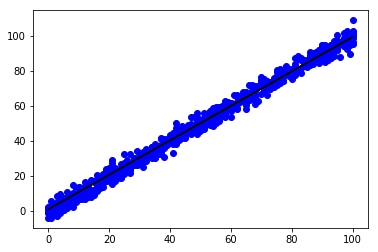

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df.x, df.y, color='b')
plt.plot(test.x, predictions, color='black')

In [14]:
# Slope and Intercept calculated directly using formula
from statistics import mean
numerator_slope = ( mean(X_train[:,0]) * mean(y_train) ) - ( mean(X_train[:,0] * y_train) )
denominator = ( mean(X_train[:,0]) * mean(X_train[:,0]) ) - ( mean(X_train[:,0] * X_train[:,0]) )
slope = numerator_slope/denominator
intercept = mean(y_train) - slope * mean(X_train[:,0])
print(slope, intercept)

1.00065638186 -0.107265464301
